In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset =  pd.read_csv("bill_authentication.csv")
#Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization,
#an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. 
#Due to the object lens and distance to the investigated object gray-scale pictures
#with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [3]:
# we would like to perform a classification according to the variance, skewness, curtosis and entropy
# we will determine if the banknote can be authenticated or not!
dataset.head(5)  

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
dataset.shape

(1372, 5)

In [5]:
missing_val_count_by_column = (dataset.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])  

Variance    1
Skewness    6
Curtosis    8
Entropy     4
dtype: int64


In [6]:
from sklearn.impute import SimpleImputer  # Imputer is for missing values
# Fill in the lines below: imputation
my_imputer = SimpleImputer()
datasetClean = pd.DataFrame(my_imputer.fit_transform(dataset))
# Fill in the lines below: imputation removed column names; put them back
datasetClean.columns = dataset.columns
# In general you can use this imputer without worrying about the missing values.

In [7]:
# Number of missing values in each column of training data
missing_val_count_by_column = (datasetClean.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0]) 

Series([], dtype: int64)


In [8]:
cor = datasetClean.corr()   # correlation calculation, we are trying to eliminate non-relevant columns from the dataset!
cor_target = abs(cor["Class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]  # change the parameter, to see if you can get more 
#columns related to "Class" . In our case "type" columns looks not relevant therefore we are going to drop it!
relevant_features.index
# but what if we dont drop? we cannot guarantee that high correlation means good results!

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [9]:
X = datasetClean.drop('Class', axis=1)
y = datasetClean['Class']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [11]:
from sklearn.svm import SVC  # support vector machine - linear
svclassifier = SVC(kernel='linear')
fitted = svclassifier.fit(X_train, y_train)

In [12]:
y_pred = svclassifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[140   2]
 [  2 131]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       142
         1.0       0.98      0.98      0.98       133

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [14]:
from sklearn.metrics import accuracy_score
print('SVC:',accuracy_score(y_test, y_pred)*100,'%')

SVC: 98.54545454545455 %


In [15]:
# Try to predict the price, you can choose any row from data set and check if the prediction "0" or "1" is correct!
test =datasetClean.loc[[1000]]   # take Nth row to check your prediction result manually 
test = test.drop('Class', axis=1)  # drop target "class" column
prediction= fitted.predict(test)
prediction

array([1.])

In [16]:
#now here is your new perspective, you cant always rely on numbers yea?
# here is how you can really predict your ML algorithm. you show it a NEW data and it gives you a result!
#dont forget about this part of code, you will need to check your final predictions in your career(dont worry about exam)

data = [[1.364,2.1539,2.457,2.99532]]   # you can also create a dataframe by yourself and feed it into SVM prediction
# imagine you have a banknote which has values as above. See if it can pass the authentication or not
# 1 for the pass. 0 for not-pass
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Variance', 'Skewness','Curtosis','Entropy']) 
df

,Variance,Skewness,Curtosis,Entropy
0,1.364,2.1539,2.457,2.99532


In [17]:
prediction= fitted.predict(df)  # you can adjust the values and see what will your model generate.
# this is a binary classification so result will be either 1 or 0 as yes or no.
prediction

array([0.])

[[160   5]
 [  0 110]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       165
         1.0       0.96      1.00      0.98       110

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

Random Forest:98.18% 


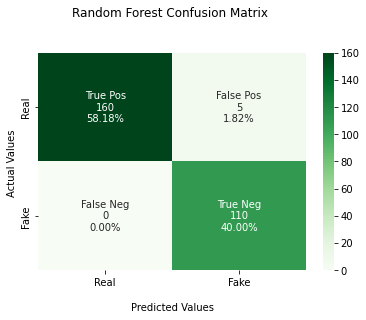

In [29]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True,random_state=101)
rf = RandomForestClassifier(max_depth = 5, max_features=4, min_samples_leaf=2)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)


print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
RF=(accuracy_score(y_test, rf_pred)*100)
print('Random Forest:%.2f%% '%  (accuracy_score(y_test, rf_pred)*100))
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, rf_pred)
group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

ax.set_title('Random Forest Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Real','Fake'])
ax.yaxis.set_ticklabels(['Real','Fake'])

## Display the visualization of the Confusion Matrix.
plt.show()
